In [ ]:
# Install only the packages that aren't already in Colab or need updates
print("Installing additional packages (keeping existing numpy/pandas)...")

# Install packages that aren't in Colab by default
!pip install tweepy vaderSentiment langdetect imbalanced-learn wordcloud python-dotenv

# Install spaCy (compatible with existing numpy)
!pip install spacy

print("Additional packages installed!")

Installing additional packages (keeping existing numpy/pandas)...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=d3637d901709c9a5210f79c108d29c43f7023ae4d1a74fe66f22e5bb49f65910
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Additional packages installed!


In [ ]:
print("Downloading spaCy model...")
!python -m spacy download en_core_web_sm

# Download NLTK resources
print("\nDownloading NLTK resources...")
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('vader_lexicon', quiet=True)

print("Models and resources downloaded!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

Models and resources downloaded!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Sklearn: {sklearn.__version__}")

# Test newly installed libraries
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model loaded successfully!")
except Exception as e:
    print(f"spaCy error: {e}")

try:
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    word_tokenize("test sentence")
    print("NLTK working!")
except Exception as e:
    print(f"NLTK error: {e}")

try:
    import tweepy
    print("Tweepy imported!")
except Exception as e:
    print(f"Tweepy error: {e}")

try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    from textblob import TextBlob
    from wordcloud import WordCloud
    print("NLP libraries imported!")
except Exception as e:
    print(f"NLP libraries error: {e}")

try:
    from imblearn.over_sampling import SMOTE
    print("Imbalanced-learn imported!")
except Exception as e:
    print(f"Imbalanced-learn error: {e}")

print("\nSetup complete! All libraries are working.")

NumPy: 2.0.2
Pandas: 2.2.2
Sklearn: 1.6.1
spaCy model loaded successfully!
NLTK error: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Tweepy imported!
NLP libraries imported!
Imbalanced-learn imported!

Setup complete! All libraries are working.


In [ ]:
!pip install gensim


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import os
import json
import pickle
import re
from collections import Counter

warnings.filterwarnings('ignore')

# Environment and API
from dotenv import load_dotenv

load_dotenv()

# Core ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             accuracy_score, precision_recall_curve, roc_curve)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.compose import ColumnTransformer

# Imbalanced learning
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

# Twitter API
import tweepy

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

try:
    import spacy
except ImportError:
    spacy = None
from textblob import TextBlob
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VaderAnalyzer

# Topic modeling
from gensim import corpora, models
from gensim.models import Word2Vec

# Statistical tests
from scipy import stats

# Set random seed
np.random.seed(42)

# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('vader_lexicon', quiet=True)
except:
    print("NLTK downloads failed - some features may not work")



In [ ]:
class AdvancedTwitterTrendPredictor:
    """
    Comprehensive Twitter trend prediction system with full preprocessing pipeline
    """

    def __init__(self, max_tweets_per_term=100):
        self.max_tweets_per_term = max_tweets_per_term
        self.tweets_data = None
        self.processed_data = None
        self.features = None
        self.target = None
        self.models = {}
        self.results = {}
        self.api = None
        self.search_terms = []
        self.output_dir = "twitter_analysis_results"
        self.timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        # NLP tools
        self.lemmatizer = WordNetLemmatizer()
        self.sentiment_analyzer = SentimentIntensityAnalyzer()
        self.vader_analyzer = VaderAnalyzer()

        # Load spaCy model (download with: python -m spacy download en_core_web_sm)
        if spacy is not None:
            try:
                self.nlp = spacy.load("en_core_web_sm")
            except OSError:
                print("Warning: spaCy English model not found. Install with: python -m spacy download en_core_web_sm")
                self.nlp = None
        else:
            self.nlp = None

        # Feature storage
        self.tfidf_features = None
        self.topic_features = None

        # Create results directory
        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)
            print(f"Created results directory: {self.output_dir}")

    def get_user_input(self):
        """Get search terms and analysis preferences from user"""
        print("\nWelcome to Advanced Twitter Trend Prediction Pipeline!")
        print("=" * 60)
        print("Note: To focus on real data quality, we recommend 50-100 tweets per term")
        print("This ensures API limits are respected and data quality is maintained")

        # Get search terms
        print("\nWhat topics would you like to analyze for trending patterns?")
        print("Examples: politics, crypto, sports, technology")

        user_input = input("Enter search terms (comma-separated): ").strip()

        if user_input:
            search_terms = [term.strip() for term in user_input.split(',')]
            search_terms = [term for term in search_terms if term]
            if len(search_terms) == 0:
                search_terms = ['python', 'datascience']
        else:
            search_terms = ['python', 'datascience']

        self.search_terms = search_terms
        print(f"Selected topics: {', '.join(search_terms)}")

        # Confirm tweet count
        print(f"\nUsing {self.max_tweets_per_term} tweets per term for real data analysis")
        total_tweets = len(search_terms) * self.max_tweets_per_term
        print(f"Total expected tweets: {total_tweets}")

        return search_terms

    def setup_twitter_api(self):
        """Setup Twitter API v2 using Bearer Token"""
        print("\nSetting up Twitter API v2 connection...")

        try:
            bearer_token = "AAAAAAAAAAAAAAAAAAAAAMYY3QEAAAAA41EjDh5wc3rj1ZqWC9hVS6renqA%3DPoPTJKvOAy6bZgvJQMwHz6EHq0Tg1CGqrt386I5Km3NhSgvOXY"

            if not bearer_token:
                print("Bearer Token not found in .env file")
                print("Please add: TWITTER_BEARER_TOKEN=your_bearer_token_here")
                return False

            self.client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
            print("Twitter API v2 connection successful!")
            return True

        except Exception as e:
            print(f"Failed to set up Twitter API v2: {e}")
            return False

    def extract_hashtags_mentions_urls(self, text):
        """Extract hashtags, mentions, and URLs from tweet text"""
        # Extract hashtags
        hashtags = re.findall(r'#(\w+)', text)

        # Extract mentions
        mentions = re.findall(r'@(\w+)', text)

        # Extract URLs
        urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)

        return hashtags, mentions, urls

    def collect_real_twitter_data(self, search_terms):
        """Collect real Twitter data using API v2"""
        if not hasattr(self, 'client'):
            print("No API client available")
            return None

        print(f"\nCollecting real Twitter data...")
        print(f"Terms: {', '.join(search_terms)}")
        print(f"Tweets per term: {self.max_tweets_per_term}")

        all_tweets = []

        for idx, term in enumerate(search_terms):
            print(f"\n[{idx + 1}/{len(search_terms)}] Searching: '{term}'")

            try:
                response = self.client.search_recent_tweets(
                    query=f"{term} -is:retweet lang:en",  # Exclude retweets, English only
                    max_results=min(self.max_tweets_per_term, 100),
                    tweet_fields=["id", "text", "created_at", "lang", "public_metrics", "author_id"],
                    user_fields=["id", "username", "name", "verified", "public_metrics", "created_at", "description",
                                 "location"],
                    expansions=["author_id"]
                )

                tweets = response.data
                users = {user.id: user for user in response.includes.get('users', [])} if response.includes else {}

                if tweets is None:
                    print("  No tweets found.")
                    continue

                for tweet in tweets:
                    # Get user data
                    user = users.get(tweet.author_id, None)

                    # Extract hashtags, mentions, URLs from text
                    hashtags, mentions, urls = self.extract_hashtags_mentions_urls(tweet.text)

                    data = {
                        'tweet_id': str(tweet.id),
                        'text': tweet.text,
                        'created_at': tweet.created_at,
                        'lang': tweet.lang or 'en',
                        'retweet_count': tweet.public_metrics.get('retweet_count', 0),
                        'favorite_count': tweet.public_metrics.get('like_count', 0),
                        'reply_count': tweet.public_metrics.get('reply_count', 0),
                        'quote_count': tweet.public_metrics.get('quote_count', 0),
                        'search_term': term,

                        # Extracted content features
                        'hashtags': hashtags,
                        'mentions': mentions,
                        'urls': urls,
                        'hashtag_count': len(hashtags),
                        'mention_count': len(mentions),
                        'url_count': len(urls),

                        # User features (with defaults if user data not available)
                        'user_id': str(tweet.author_id),
                        'user_screen_name': user.username if user else f'user_{tweet.author_id}',
                        'user_name': user.name if user else 'Unknown User',
                        'user_followers_count': user.public_metrics.get('followers_count', 0) if user else 0,
                        'user_friends_count': user.public_metrics.get('following_count', 0) if user else 0,
                        'user_statuses_count': user.public_metrics.get('tweet_count', 0) if user else 0,
                        'user_verified': user.verified if user else False,
                        'user_created_at': user.created_at if user else tweet.created_at,
                        'user_description': user.description if user else '',
                        'user_location': user.location if user else '',

                        # Content flags
                        'has_media': False,  # Would need media fields to detect
                        'is_retweet': tweet.text.startswith('RT @'),
                        'is_reply': False,  # Would need conversation_id or in_reply_to_user_id
                        'is_quote': tweet.public_metrics.get('quote_count', 0) > 0,

                        # Text length
                        'text_length': len(tweet.text),

                        # Geographic info (defaults)
                        'coordinates': None,
                        'place': None
                    }
                    all_tweets.append(data)

                print(f"  Collected {len(tweets)} tweets for '{term}'")

            except Exception as e:
                print(f"  Error fetching tweets for '{term}': {e}")
                continue

        if len(all_tweets) == 0:
            print("No tweets collected. Exiting.")
            return None

        self.tweets_data = pd.DataFrame(all_tweets)
        print(f"\nTotal tweets collected: {len(self.tweets_data)}")

        self.save_raw_data()
        return self.tweets_data

    def save_raw_data(self):
        """Save raw tweet data"""
        if self.tweets_data is not None:
            filename = f"{self.output_dir}/raw_tweets_{self.timestamp}.csv"
            # Convert lists to strings for CSV storage
            save_data = self.tweets_data.copy()
            for col in ['hashtags', 'mentions', 'urls']:
                if col in save_data.columns:
                    save_data[col] = save_data[col].apply(lambda x: '|'.join(x) if isinstance(x, list) else str(x))
            save_data.to_csv(filename, index=False)
            print(f"Raw data saved to: {filename}")

    def preprocess_data(self):
        """
        Comprehensive data preprocessing pipeline
        Stage 2: Data Preprocessing
        """
        print("\n" + "=" * 50)
        print("STAGE 2: DATA PREPROCESSING")
        print("=" * 50)

        if self.tweets_data is None or len(self.tweets_data) == 0:
            print("No data to preprocess")
            return None

        df = self.tweets_data.copy()
        print(f"Starting preprocessing with {len(df)} tweets")

        # 2.1 Language Detection and Filtering
        print("\n2.1 Language Detection and Filtering...")
        df = self.filter_english_tweets(df)

        # 2.2 Text Cleaning
        print("\n2.2 Text Cleaning...")
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # 2.3 Tokenization and Lemmatization
        print("\n2.3 Tokenization and Lemmatization...")
        df['tokens'] = df['cleaned_text'].apply(self.tokenize_and_lemmatize)
        df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

        # 2.4 Handle Missing Values
        print("\n2.4 Handling Missing Values...")
        df = self.handle_missing_values(df)

        # 2.5 Feature Parsing and Transformation
        print("\n2.5 Feature Engineering...")
        df = self.parse_structured_features(df)

        # 2.6 Data Quality Checks
        print("\n2.6 Data Quality Checks...")
        df = self.quality_checks(df)

        self.processed_data = df

        # Save preprocessed data
        filename = f"{self.output_dir}/preprocessed_data_{self.timestamp}.csv"
        save_df = df.copy()
        # Convert lists to strings for CSV
        for col in ['hashtags', 'mentions', 'urls', 'tokens']:
            if col in save_df.columns:
                save_df[col] = save_df[col].apply(lambda x: '|'.join(x) if isinstance(x, list) else str(x))
        save_df.to_csv(filename, index=False)
        print(f"Preprocessed data saved to: {filename}")

        print(f"Preprocessing completed. Final dataset: {len(df)} tweets")
        return df

    def filter_english_tweets(self, df):
        """Filter tweets to keep only English content"""
        initial_count = len(df)

        # Keep tweets that are marked as English or detected as English
        english_mask = df['lang'] == 'en'

        # Additional language detection for unmarked tweets
        for idx, row in df[~english_mask].iterrows():
            try:
                detected_lang = detect(row['text'])
                if detected_lang == 'en':
                    english_mask.loc[idx] = True
            except:
                continue  # Skip if detection fails

        df_english = df[english_mask].copy()

        print(f"  Filtered {initial_count} -> {len(df_english)} English tweets")
        return df_english

    def clean_text(self, text):
        """Comprehensive text cleaning"""
        if pd.isna(text) or text == '':
            return ''

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove mentions and hashtags (keep the content)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#(\w+)', r'\1', text)

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)

        # Convert to lowercase
        text = text.lower().strip()

        return text

    def tokenize_and_lemmatize(self, text):
        """Tokenize and lemmatize text"""
        if not text or text == '':
            return []

        try:
            # Tokenize
            tokens = word_tokenize(text)

            # Remove stopwords
            stop_words = set(stopwords.words('english'))
            tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

            # Lemmatize
            lemmatized = [self.lemmatizer.lemmatize(token) for token in tokens]

            return lemmatized
        except:
            return []

    def handle_missing_values(self, df):
        """Handle missing values in the dataset"""
        # Numeric columns - fill with 0 or median
        numeric_cols = ['user_followers_count', 'user_friends_count', 'user_statuses_count',
                        'retweet_count', 'favorite_count', 'reply_count', 'quote_count',
                        'hashtag_count', 'mention_count', 'url_count']

        for col in numeric_cols:
            if col in df.columns:
                df[col] = df[col].fillna(0)

        # Boolean columns
        bool_cols = ['user_verified', 'has_media', 'is_retweet', 'is_reply', 'is_quote']
        for col in bool_cols:
            if col in df.columns:
                df[col] = df[col].fillna(False)

        # Text columns
        text_cols = ['user_description', 'user_location', 'place']
        for col in text_cols:
            if col in df.columns:
                df[col] = df[col].fillna('')

        # List columns
        list_cols = ['hashtags', 'mentions', 'urls']
        for col in list_cols:
            if col in df.columns:
                df[col] = df[col].apply(lambda x: x if isinstance(x, list) else [])

        return df

    def parse_structured_features(self, df):
        """Parse and transform structured features"""
        # Convert boolean columns to integers
        bool_columns = ['user_verified', 'has_media', 'is_retweet', 'is_reply', 'is_quote']
        for col in bool_columns:
            if col in df.columns:
                df[col] = df[col].astype(int)

        # Ensure count columns exist (they should from data collection)
        if 'hashtag_count' not in df.columns:
            df['hashtag_count'] = df['hashtags'].apply(len) if 'hashtags' in df.columns else 0
        if 'mention_count' not in df.columns:
            df['mention_count'] = df['mentions'].apply(len) if 'mentions' in df.columns else 0
        if 'url_count' not in df.columns:
            df['url_count'] = df['urls'].apply(len) if 'urls' in df.columns else 0

        # User account age
        df['user_account_age_days'] = (df['created_at'] - df['user_created_at']).dt.days
        df['user_account_age_days'] = df['user_account_age_days'].fillna(365).abs()  # Default to 1 year

        # Time features
        df['hour'] = df['created_at'].dt.hour
        df['day_of_week'] = df['created_at'].dt.dayofweek
        df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

        return df

    def quality_checks(self, df):
        """Perform data quality checks and cleaning"""
        initial_count = len(df)

        # Remove tweets with no text content after cleaning
        df = df[df['cleaned_text'].str.len() > 0]

        # Remove duplicates
        df = df.drop_duplicates(subset=['tweet_id'])

        # Remove outliers (extreme values)
        for col in ['user_followers_count', 'retweet_count', 'favorite_count']:
            if col in df.columns:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 3 * IQR
                upper_bound = Q3 + 3 * IQR
                df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        print(f"  Quality checks: {initial_count} -> {len(df)} tweets retained")
        return df

    def exploratory_data_analysis(self):
        """
        Comprehensive EDA
        Stage 3: Exploratory Data Analysis
        """
        print("\n" + "=" * 50)
        print("STAGE 3: EXPLORATORY DATA ANALYSIS")
        print("=" * 50)

        if self.processed_data is None:
            print("No processed data available for EDA")
            return

        df = self.processed_data

        # Create comprehensive EDA visualizations
        fig, axes = plt.subplots(3, 3, figsize=(20, 15))
        fig.suptitle('Twitter Data Exploratory Analysis', fontsize=16, fontweight='bold')

        # 1. Tweet distribution by search term
        term_counts = df['search_term'].value_counts()
        axes[0, 0].bar(term_counts.index, term_counts.values, color='skyblue')
        axes[0, 0].set_title('Tweet Distribution by Search Term')
        axes[0, 0].set_xlabel('Search Term')
        axes[0, 0].set_ylabel('Count')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # 2. Text length distribution
        axes[0, 1].hist(df['text_length'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0, 1].set_title('Text Length Distribution')
        axes[0, 1].set_xlabel('Characters')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(df['text_length'].mean(), color='red', linestyle='--',
                           label=f'Mean: {df["text_length"].mean():.0f}')
        axes[0, 1].legend()

        # 3. Engagement over time
        df['created_at'] = pd.to_datetime(df['created_at'])
        df['total_engagement'] = df['retweet_count'] + df['favorite_count'] + df['reply_count']
        if len(df) > 1:
            hourly_engagement = df.groupby('hour')['total_engagement'].mean()
            axes[0, 2].plot(hourly_engagement.index, hourly_engagement.values, marker='o', color='purple')
            axes[0, 2].set_title('Average Engagement by Hour')
            axes[0, 2].set_xlabel('Hour of Day')
            axes[0, 2].set_ylabel('Average Engagement')
            axes[0, 2].grid(True, alpha=0.3)

        # 4. Hashtag frequency
        all_hashtags = [tag for hashtags in df['hashtags'] for tag in hashtags if isinstance(hashtags, list)]
        if all_hashtags:
            hashtag_freq = Counter(all_hashtags).most_common(10)
            if hashtag_freq:
                tags, counts = zip(*hashtag_freq)
                axes[1, 0].barh(range(len(tags)), counts, color='orange')
                axes[1, 0].set_yticks(range(len(tags)))
                axes[1, 0].set_yticklabels(tags)
                axes[1, 0].set_title('Top 10 Hashtags')
                axes[1, 0].set_xlabel('Frequency')
        else:
            axes[1, 0].text(0.5, 0.5, 'No hashtags found', ha='center', va='center', transform=axes[1, 0].transAxes)
            axes[1, 0].set_title('Top 10 Hashtags')

        # 5. User verification vs engagement
        if df['user_verified'].nunique() > 1:
            verified_engagement = df.groupby('user_verified')['total_engagement'].mean()
            axes[1, 1].bar(['Not Verified', 'Verified'], verified_engagement.values, color=['lightcoral', 'lightblue'])
        else:
            axes[1, 1].bar(['All Users'], [df['total_engagement'].mean()], color=['lightblue'])
        axes[1, 1].set_title('Engagement by Verification Status')
        axes[1, 1].set_ylabel('Average Engagement')

        # 6. Follower count distribution (log scale)
        df_followers = df[df['user_followers_count'] > 0]
        if len(df_followers) > 0:
            axes[1, 2].hist(np.log10(df_followers['user_followers_count'] + 1), bins=20, alpha=0.7, color='gold',
                            edgecolor='black')
            axes[1, 2].set_title('User Followers Distribution (Log Scale)')
            axes[1, 2].set_xlabel('Log10(Followers + 1)')
            axes[1, 2].set_ylabel('Frequency')

        # 7. Weekend vs weekday patterns
        weekend_comparison = df.groupby('is_weekend')[['retweet_count', 'favorite_count']].mean()
        if len(weekend_comparison) > 1:
            x_pos = np.arange(len(weekend_comparison.columns))
            width = 0.35
            axes[2, 0].bar(x_pos - width / 2, weekend_comparison.loc[0], width, label='Weekday', color='lightsteelblue')
            axes[2, 0].bar(x_pos + width / 2, weekend_comparison.loc[1], width, label='Weekend', color='lightpink')
            axes[2, 0].set_title('Weekday vs Weekend Engagement')
            axes[2, 0].set_xticks(x_pos)
            axes[2, 0].set_xticklabels(weekend_comparison.columns)
            axes[2, 0].legend()

        # 8. Content features correlation
        content_features = ['text_length', 'hashtag_count', 'mention_count', 'url_count', 'total_engagement']
        available_features = [col for col in content_features if col in df.columns]
        if len(available_features) >= 2:
            corr_matrix = df[available_features].corr()
            im = axes[2, 1].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
            axes[2, 1].set_xticks(range(len(available_features)))
            axes[2, 1].set_yticks(range(len(available_features)))
            axes[2, 1].set_xticklabels(available_features, rotation=45)
            axes[2, 1].set_yticklabels(available_features)
            axes[2, 1].set_title('Content Features Correlation')

            # Add correlation values to heatmap
            for i in range(len(available_features)):
                for j in range(len(available_features)):
                    axes[2, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                                    ha='center', va='center', color='black', fontsize=8)

        # 9. Engagement distribution
        engagement_data = df['total_engagement'][df['total_engagement'] > 0]
        if len(engagement_data) > 0:
            axes[2, 2].hist(engagement_data, bins=20, alpha=0.7, color='mediumseagreen', edgecolor='black')
            axes[2, 2].set_title('Total Engagement Distribution')
            axes[2, 2].set_xlabel('Total Engagement')
            axes[2, 2].set_ylabel('Frequency')
            if engagement_data.max() > 10:
                axes[2, 2].set_yscale('log')

        plt.tight_layout()

        # Save EDA plots
        eda_file = f"{self.output_dir}/eda_analysis_{self.timestamp}.png"
        plt.savefig(eda_file, dpi=300, bbox_inches='tight')
        print(f"EDA visualizations saved to: {eda_file}")
        plt.show()

        # Print summary statistics
        self.print_eda_summary(df)

    def print_eda_summary(self, df):
        """Print comprehensive EDA summary statistics"""
        print("\nEDA SUMMARY STATISTICS")
        print("-" * 30)

        print(f"Dataset Overview:")
        print(f"  Total tweets: {len(df):,}")
        print(f"  Date range: {df['created_at'].min()} to {df['created_at'].max()}")
        print(f"  Unique users: {df['user_id'].nunique():,}")
        print(f"  Search terms: {', '.join(df['search_term'].unique())}")

        print(f"\nEngagement Statistics:")
        engagement_stats = df[['retweet_count', 'favorite_count', 'reply_count', 'total_engagement']].describe()
        print(engagement_stats)

        print(f"\nContent Statistics:")
        print(f"  Average text length: {df['text_length'].mean():.1f} characters")
        print(f"  Tweets with hashtags: {(df['hashtag_count'] > 0).mean() * 100:.1f}%")
        print(f"  Tweets with mentions: {(df['mention_count'] > 0).mean() * 100:.1f}%")
        print(f"  Tweets with URLs: {(df['url_count'] > 0).mean() * 100:.1f}%")
        print(f"  Verified users: {df['user_verified'].mean() * 100:.1f}%")

    def advanced_feature_engineering(self):
        """
        Advanced feature engineering including NLP features
        Stage 4: Feature Engineering
        """
        print("\n" + "=" * 50)
        print("STAGE 4: ADVANCED FEATURE ENGINEERING")
        print("=" * 50)

        if self.processed_data is None:
            print("No processed data available")
            return None

        df = self.processed_data.copy()

        # 4.1 Sentiment Analysis
        print("4.1 Sentiment Analysis...")
        df = self.add_sentiment_features(df)

        # 4.2 Content-based features
        print("4.2 Content-based Features...")
        df = self.add_content_features(df)

        # 4.3 User-based features
        print("4.3 User-based Features...")
        df = self.add_user_features(df)

        # 4.4 Engagement ratio features
        print("4.4 Engagement Ratio Features...")
        df = self.add_engagement_features(df)

        # 4.5 Temporal features
        print("4.5 Temporal Features...")
        df = self.add_temporal_features(df)

        # 4.6 NLP features (TF-IDF, Topics)
        print("4.6 NLP Features...")
        df = self.add_nlp_features(df)

        self.features_data = df

        # Save feature-engineered data
        filename = f"{self.output_dir}/features_engineered_{self.timestamp}.csv"
        save_df = df.copy()

        # Convert complex columns for CSV storage
        for col in ['hashtags', 'mentions', 'urls', 'tokens']:
            if col in save_df.columns:
                save_df[col] = save_df[col].apply(lambda x: '|'.join(x) if isinstance(x, list) else str(x))

        # Save without TF-IDF features (too many columns)
        tfidf_cols = [col for col in save_df.columns if col.startswith('tfidf_')]
        save_df = save_df.drop(columns=tfidf_cols)
        save_df.to_csv(filename, index=False)

        print(f"Feature-engineered data saved to: {filename}")
        print(f"Total features created: {len(df.columns)}")

        return df

    def add_sentiment_features(self, df):
        """Add comprehensive sentiment analysis features"""
        # TextBlob sentiment
        df['sentiment_polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
        df['sentiment_subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

        # VADER sentiment
        def get_vader_scores(text):
            scores = self.vader_analyzer.polarity_scores(text)
            return pd.Series([scores['compound'], scores['pos'], scores['neu'], scores['neg']])

        vader_cols = ['vader_compound', 'vader_positive', 'vader_neutral', 'vader_negative']
        df[vader_cols] = df['text'].apply(get_vader_scores)

        # Sentiment categories
        df['sentiment_category'] = df['sentiment_polarity'].apply(
            lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral')
        )

        return df

    def add_content_features(self, df):
        """Add content-based features"""
        # Text complexity features
        df['word_count'] = df['tokens'].apply(len)
        df['avg_word_length'] = df['tokens'].apply(lambda x: np.mean([len(word) for word in x]) if x else 0)
        df['unique_word_ratio'] = df['tokens'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)

        # Content density
        df['content_density'] = (df['hashtag_count'] + df['mention_count'] + df['url_count']) / (df['text_length'] + 1)
        df['hashtag_density'] = df['hashtag_count'] / (df['text_length'] + 1)
        df['mention_density'] = df['mention_count'] / (df['text_length'] + 1)

        # Content type indicators
        df['has_hashtags'] = (df['hashtag_count'] > 0).astype(int)
        df['has_mentions'] = (df['mention_count'] > 0).astype(int)
        df['has_urls'] = (df['url_count'] > 0).astype(int)

        # Exclamation and question marks
        df['exclamation_count'] = df['text'].str.count('!')
        df['question_count'] = df['text'].str.count('\?')
        df['caps_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

        return df

    def add_user_features(self, df):
        """Add user-based features"""
        # User ratios
        df['followers_following_ratio'] = df['user_followers_count'] / (df['user_friends_count'] + 1)
        df['tweets_per_day'] = df['user_statuses_count'] / (df['user_account_age_days'] + 1)

        # User influence score
        df['user_influence_score'] = (
                np.log1p(df['user_followers_count']) *
                (1 + df['user_verified'].astype(int)) *
                np.log1p(df['user_account_age_days'])
        )

        # User engagement propensity
        df['user_engagement_propensity'] = np.log1p(df['user_statuses_count']) / np.log1p(
            df['user_account_age_days'] + 1)

        # User description features
        df['user_desc_length'] = df['user_description'].str.len()
        df['user_has_location'] = (df['user_location'] != '').astype(int)
        df['user_has_description'] = (df['user_description'] != '').astype(int)

        return df

    def add_engagement_features(self, df):
        """Add engagement-based features"""
        # Total engagement (already calculated in EDA)
        if 'total_engagement' not in df.columns:
            df['total_engagement'] = df['retweet_count'] + df['favorite_count'] + df['reply_count']

        # Engagement ratios
        df['retweet_like_ratio'] = df['retweet_count'] / (df['favorite_count'] + 1)
        df['reply_engagement_ratio'] = df['reply_count'] / (df['total_engagement'] + 1)

        # Normalized engagement (by follower count)
        df['engagement_rate'] = df['total_engagement'] / (df['user_followers_count'] + 1)
        df['retweet_rate'] = df['retweet_count'] / (df['user_followers_count'] + 1)
        df['like_rate'] = df['favorite_count'] / (df['user_followers_count'] + 1)

        # Engagement velocity (fixing timezone issue)
        try:
            # Make datetime.now() timezone-aware to match tweet timestamps
            from datetime import timezone
            now_utc = datetime.now(timezone.utc)
            df['engagement_per_hour'] = df['total_engagement'] / (
                    (now_utc - df['created_at']).dt.total_seconds() / 3600 + 1)
        except:
            # Fallback: just use a default value
            df['engagement_per_hour'] = df['total_engagement'] / 1.0

        return df

    def add_temporal_features(self, df):
        """Add temporal features"""
        # Time-based features
        df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
        df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
        df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

        # Business hours
        df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17) & (df['day_of_week'] < 5)).astype(int)
        df['is_peak_hours'] = ((df['hour'] >= 12) & (df['hour'] <= 14)).astype(int)
        df['is_evening'] = ((df['hour'] >= 18) & (df['hour'] <= 22)).astype(int)

        # Tweet age (fixing timezone issue)
        try:
            from datetime import timezone
            now_utc = datetime.now(timezone.utc)
            df['tweet_age_hours'] = (now_utc - df['created_at']).dt.total_seconds() / 3600
        except:
            # Fallback: use a default age
            df['tweet_age_hours'] = 1.0

        return df

    def add_nlp_features(self, df):
        """Add NLP-based features including TF-IDF and topic modeling"""
        print("  Creating TF-IDF features...")

        # Generate Word Cloud
        self.generate_word_cloud(df)

        # TF-IDF features
        if len(df) > 10:  # Only if we have enough data
            tfidf_vectorizer = TfidfVectorizer(
                max_features=50,  # Reduced for smaller datasets
                min_df=2,
                max_df=0.95,
                stop_words='english',
                ngram_range=(1, 2)
            )

            # Filter out empty processed texts
            valid_texts = df['processed_text'].fillna('').str.strip()
            valid_texts = valid_texts[valid_texts != '']

            if len(valid_texts) > 5:
                tfidf_matrix = tfidf_vectorizer.fit_transform(valid_texts)
                tfidf_feature_names = [f'tfidf_{name}' for name in tfidf_vectorizer.get_feature_names_out()]

                # Create TF-IDF dataframe with proper indexing
                tfidf_df = pd.DataFrame(
                    tfidf_matrix.toarray(),
                    columns=tfidf_feature_names,
                    index=valid_texts.index
                )

                # Merge with main dataframe
                df = df.merge(tfidf_df, left_index=True, right_index=True, how='left')
                df[tfidf_feature_names] = df[tfidf_feature_names].fillna(0)

                self.tfidf_vectorizer = tfidf_vectorizer

                print("  Creating topic modeling features...")
                # Topic modeling with LDA
                try:
                    lda_model = LatentDirichletAllocation(n_components=3, random_state=42, max_iter=10)
                    topic_probs = lda_model.fit_transform(tfidf_matrix)

                    topic_df = pd.DataFrame(topic_probs, columns=[f'topic_{i}_prob' for i in range(3)],
                                            index=valid_texts.index)
                    df = df.merge(topic_df, left_index=True, right_index=True, how='left')

                    # Fill missing topic probabilities
                    for i in range(3):
                        df[f'topic_{i}_prob'] = df[f'topic_{i}_prob'].fillna(1 / 3)

                    self.lda_model = lda_model
                except Exception as e:
                    print(f"    Topic modeling failed: {e} - skipping")

        # Word embeddings features (simplified)
        print("  Adding word-level features...")
        df['avg_word_length'] = df['tokens'].apply(lambda x: np.mean([len(word) for word in x]) if x else 0)
        df['max_word_length'] = df['tokens'].apply(lambda x: max([len(word) for word in x]) if x else 0)
        df['stop_word_ratio'] = df['tokens'].apply(self.calculate_stopword_ratio)

        return df

    def generate_word_cloud(self, df):
        """Generate and save word cloud from processed text"""
        print("  Generating word cloud...")

        try:
            from wordcloud import WordCloud

            # Combine all processed text - fix the list concatenation issue
            all_tokens = []
            for token_list in df['tokens']:
                if isinstance(token_list, list):
                    all_tokens.extend(token_list)

            all_text = ' '.join(all_tokens)

            if len(all_text.strip()) > 0:
                # Create word cloud
                wordcloud = WordCloud(
                    width=800,
                    height=400,
                    background_color='white',
                    max_words=100,
                    colormap='viridis',
                    relative_scaling=0.5
                ).generate(all_text)

                # Create plot
                plt.figure(figsize=(12, 6))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title(f'Word Cloud - Most Common Terms\nSearch Terms: {", ".join(self.search_terms)}',
                          fontsize=16, fontweight='bold', pad=20)

                # Save word cloud
                wordcloud_file = f"{self.output_dir}/wordcloud_{self.timestamp}.png"
                plt.savefig(wordcloud_file, dpi=300, bbox_inches='tight')
                plt.show()

                print(f"    Word cloud saved to: {wordcloud_file}")

                # Also save word frequency data
                word_freq = Counter(all_tokens)
                top_words = dict(word_freq.most_common(20))

                freq_file = f"{self.output_dir}/word_frequencies_{self.timestamp}.json"
                with open(freq_file, 'w') as f:
                    json.dump(top_words, f, indent=2)

                print(f"    Top 20 word frequencies saved to: {freq_file}")

            else:
                print("    No text available for word cloud generation")

        except ImportError:
            print("    WordCloud library not installed. Install with: pip install wordcloud")
        except Exception as e:
            print(f"    Word cloud generation failed: {e}")

    def calculate_stopword_ratio(self, tokens):
        """Calculate ratio of stopwords in tokens"""
        if not tokens:
            return 0
        stop_words = set(stopwords.words('english'))
        original_tokens = word_tokenize(' '.join(tokens).lower())
        stop_count = sum(1 for token in original_tokens if token in stop_words)
        return stop_count / len(original_tokens) if original_tokens else 0

    def create_target_variable(self):
        """
        Create target variable for trend prediction
        Stage 5: Label Construction
        """
        print("\n" + "=" * 50)
        print("STAGE 5: LABEL CONSTRUCTION (TARGET DEFINITION)")
        print("=" * 50)

        if self.features_data is None:
            print("No feature data available")
            return None

        df = self.features_data.copy()

        # Check if all engagement is zero (common with recent tweets)
        if df['total_engagement'].max() == 0:
            print("⚠️  All tweets have zero engagement (recent tweets)")
            print("Creating alternative trending criteria based on content features...")

            # Create composite trending score based on multiple factors
            trending_score = 0

            # Factor 1: User influence (40% weight)
            trending_score += 0.4 * (df['user_influence_score'] / (df['user_influence_score'].max() + 1))

            # Factor 2: Content engagement potential (30% weight)
            content_score = (
                    df['hashtag_count'] * 0.3 +
                    df['mention_count'] * 0.2 +
                    df['url_count'] * 0.1 +
                    (df['sentiment_polarity'].abs() * 2) * 0.2 +  # Strong sentiment
                    (df['exclamation_count'] > 0).astype(int) * 0.2
            )
            trending_score += 0.3 * (content_score / (content_score.max() + 1))

            # Factor 3: Temporal factors (20% weight)
            temporal_score = (
                    df['is_business_hours'] * 0.3 +
                    df['is_peak_hours'] * 0.4 +
                    df['is_evening'] * 0.3
            )
            trending_score += 0.2 * temporal_score

            # Factor 4: Text complexity (10% weight)
            text_score = (
                    (df['word_count'] > df['word_count'].median()).astype(int) * 0.5 +
                    (df['caps_ratio'] > 0.1).astype(int) * 0.5
            )
            trending_score += 0.1 * text_score

            df['trending_score'] = trending_score

            # Use top 30% as trending to ensure some class balance
            threshold = df['trending_score'].quantile(0.7)
            df['is_trending'] = (df['trending_score'] >= threshold).astype(int)

            print(f"Created composite trending score (0-1 scale)")
            print(f"Trending threshold: {threshold:.3f}")

        else:
            # Original engagement-based approach
            thresholds = [0.1, 0.2, 0.3]  # Top 10%, 20%, 30%

            print("Analyzing different trending thresholds:")
            for threshold in thresholds:
                engagement_threshold = df['total_engagement'].quantile(1 - threshold)
                is_trending = (df['total_engagement'] >= engagement_threshold).astype(int)
                print(
                    f"  Top {threshold * 100:.0f}% threshold: {is_trending.sum()} trending tweets ({is_trending.mean() * 100:.1f}%)")

            # Use 20% as default (balanced for ML)
            selected_threshold = 0.2
            engagement_threshold = df['total_engagement'].quantile(1 - selected_threshold)
            df['is_trending'] = (df['total_engagement'] >= engagement_threshold).astype(int)

            print(f"\nSelected threshold: Top {selected_threshold * 100:.0f}%")
            print(f"Engagement threshold: {engagement_threshold:.0f}")

        print(f"Class distribution:")
        print(df['is_trending'].value_counts())
        print(f"Class balance: {df['is_trending'].mean() * 100:.1f}% trending")

        # Ensure we have at least 2 classes
        if df['is_trending'].nunique() < 2:
            print("⚠️  Still only one class. Forcing 50-50 split based on trending score...")
            median_score = df.get('trending_score', df['user_influence_score']).median()
            df['is_trending'] = (df.get('trending_score', df['user_influence_score']) > median_score).astype(int)
            print("Final class distribution:")
            print(df['is_trending'].value_counts())

        self.labeled_data = df
        return df

    def prepare_features_for_modeling(self):
        """Prepare final feature matrix for machine learning"""
        print("\n" + "=" * 50)
        print("STAGE 6: FEATURE PREPARATION FOR MODELING")
        print("=" * 50)

        if self.labeled_data is None:
            print("No labeled data available")
            return None, None

        df = self.labeled_data.copy()

        # Select features for modeling (exclude metadata and text columns)
        exclude_columns = [
            'tweet_id', 'text', 'cleaned_text', 'processed_text', 'tokens', 'created_at',
            'user_id', 'user_screen_name', 'user_name', 'user_created_at', 'search_term',
            'hashtags', 'mentions', 'urls', 'coordinates', 'place', 'lang',
            'user_description', 'user_location', 'sentiment_category',
            'total_engagement', 'tweet_age_hours'  # Target-related features
        ]

        feature_columns = [col for col in df.columns if col not in exclude_columns and col != 'is_trending']

        # Handle any remaining non-numeric columns
        numeric_features = []
        for col in feature_columns:
            if df[col].dtype in ['int64', 'float64', 'bool']:
                numeric_features.append(col)
            else:
                print(f"  Skipping non-numeric column: {col}")

        X = df[numeric_features].copy()
        y = df['is_trending'].copy()

        # Handle any infinite values
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.fillna(0)

        print(f"Final feature matrix shape: {X.shape}")
        print(f"Target variable shape: {y.shape}")
        print(f"Features selected: {len(numeric_features)}")

        # Save feature names for later reference
        self.final_feature_names = numeric_features

        self.X = X
        self.y = y

        return X, y

    def train_advanced_models(self):
        """
        Train multiple ML models with proper validation
        Stage 6: Model Training & Validation
        """
        print("\n" + "=" * 50)
        print("STAGE 6: MODEL TRAINING & VALIDATION")
        print("=" * 50)

        if self.X is None or self.y is None:
            print("No feature matrix available")
            return

        # Check if we have enough data for training
        if len(self.X) < 20:
            print(f"Warning: Only {len(self.X)} samples available. Results may not be reliable.")

        # Split data
        test_size = min(0.3, max(0.1, 10 / len(self.X)))  # Adaptive test size
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=42, stratify=self.y
        )

        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")
        print(f"Feature dimensionality: {X_train.shape[1]}")

        # Initialize models
        models = {
            'logistic_regression': Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
            ]),
            'random_forest': RandomForestClassifier(
                n_estimators=50, random_state=42, max_depth=5,  # Reduced for small datasets
                min_samples_split=5, class_weight='balanced'
            ),
            'svm': Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', SVC(random_state=42, probability=True, class_weight='balanced'))
            ])
        }

        # Handle class imbalance with SMOTE (only if we have enough data)
        X_train_balanced, y_train_balanced = X_train, y_train
        if len(X_train) >= 20 and len(np.unique(y_train)) > 1:
            print("\nHandling class imbalance with SMOTE...")
            try:
                smote = SMOTE(random_state=42, k_neighbors=min(5, len(X_train) // 4))
                X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
                print(f"After SMOTE: {len(X_train_balanced)} samples")
                print(f"Class distribution: {np.bincount(y_train_balanced)}")
            except Exception as e:
                print(f"SMOTE failed: {e}, using original training data")

        # Train and evaluate models
        self.trained_models = {}
        self.model_results = {}

        for name, model in models.items():
            print(f"\nTraining {name}...")

            try:
                # Train model
                model.fit(X_train_balanced, y_train_balanced)

                # Make predictions
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                auc_score = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else 0.5

                # Cross-validation (only if we have enough data)
                cv_scores = [auc_score]  # Default fallback
                if len(X_train_balanced) >= 10:
                    try:
                        cv = min(3, len(X_train_balanced) // 3)  # Adaptive CV folds
                        cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=cv, scoring='roc_auc')
                    except:
                        cv_scores = [auc_score]

                self.trained_models[name] = model
                self.model_results[name] = {
                    'accuracy': accuracy,
                    'auc_score': auc_score,
                    'cv_mean': np.mean(cv_scores),
                    'cv_std': np.std(cv_scores),
                    'y_pred': y_pred,
                    'y_pred_proba': y_pred_proba
                }

                print(f"  Accuracy: {accuracy:.3f}")
                print(f"  AUC Score: {auc_score:.3f}")
                print(f"  CV AUC: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

            except Exception as e:
                print(f"  Training failed: {e}")

        # Store test data for evaluation
        self.X_test = X_test
        self.y_test = y_test

        # Save models
        self.save_trained_models()

    def save_trained_models(self):
        """Save trained models to files"""
        if not self.trained_models:
            return

        models_dir = f"{self.output_dir}/trained_models_{self.timestamp}"
        if not os.path.exists(models_dir):
            os.makedirs(models_dir)

        for name, model in self.trained_models.items():
            filename = f"{models_dir}/{name}.pkl"
            with open(filename, 'wb') as f:
                pickle.dump(model, f)

        # Save feature names
        if hasattr(self, 'final_feature_names'):
            with open(f"{models_dir}/feature_names.pkl", 'wb') as f:
                pickle.dump(self.final_feature_names, f)

        print(f"Models saved to: {models_dir}")

    def comprehensive_model_evaluation(self):
        """
        Comprehensive model evaluation with multiple metrics
        Stage 7: Model Evaluation
        """
        print("\n" + "=" * 50)
        print("STAGE 7: MODEL EVALUATION")
        print("=" * 50)

        if not self.model_results:
            print("No model results available")
            return

        # Create comprehensive evaluation plots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Comprehensive Model Evaluation', fontsize=16, fontweight='bold')

        # 1. Model performance comparison
        models = list(self.model_results.keys())
        accuracies = [self.model_results[m]['accuracy'] for m in models]
        auc_scores = [self.model_results[m]['auc_score'] for m in models]

        x = np.arange(len(models))
        width = 0.35

        axes[0, 0].bar(x - width / 2, accuracies, width, label='Accuracy', alpha=0.8)
        axes[0, 0].bar(x + width / 2, auc_scores, width, label='AUC Score', alpha=0.8)
        axes[0, 0].set_xlabel('Models')
        axes[0, 0].set_ylabel('Score')
        axes[0, 0].set_title('Model Performance Comparison')
        axes[0, 0].set_xticks(x)
        axes[0, 0].set_xticklabels(models, rotation=45)
        axes[0, 0].legend()
        axes[0, 0].set_ylim(0, 1)

        # 2. ROC Curves
        if len(np.unique(self.y_test)) > 1:
            for name in models:
                if self.model_results[name]['auc_score'] > 0:
                    try:
                        fpr, tpr, _ = roc_curve(self.y_test, self.model_results[name]['y_pred_proba'])
                        auc_score = self.model_results[name]['auc_score']
                        axes[0, 1].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')
                    except:
                        continue

            axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random')
            axes[0, 1].set_xlabel('False Positive Rate')
            axes[0, 1].set_ylabel('True Positive Rate')
            axes[0, 1].set_title('ROC Curves')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)

        # 3. Precision-Recall Curves
        for name in models:
            try:
                precision, recall, _ = precision_recall_curve(self.y_test, self.model_results[name]['y_pred_proba'])
                axes[0, 2].plot(recall, precision, label=name)
            except:
                continue

        axes[0, 2].set_xlabel('Recall')
        axes[0, 2].set_ylabel('Precision')
        axes[0, 2].set_title('Precision-Recall Curves')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)

        # 4. Confusion matrices (for best model)
        if models:
            best_model_name = max(models, key=lambda x: self.model_results[x]['auc_score'])
            y_pred_best = self.model_results[best_model_name]['y_pred']
            cm = confusion_matrix(self.y_test, y_pred_best)

            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
            axes[1, 0].set_xlabel('Predicted')
            axes[1, 0].set_ylabel('Actual')
            axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}')

        # 5. Feature importance (Random Forest)
        if 'random_forest' in self.trained_models:
            rf_model = self.trained_models['random_forest']
            importances = rf_model.feature_importances_
            indices = np.argsort(importances)[-min(15, len(importances)):]  # Top features

            axes[1, 1].barh(range(len(indices)), importances[indices])
            axes[1, 1].set_yticks(range(len(indices)))
            axes[1, 1].set_yticklabels([self.final_feature_names[i] for i in indices], fontsize=8)
            axes[1, 1].set_xlabel('Importance')
            axes[1, 1].set_title(f'Top {len(indices)} Feature Importances (Random Forest)')

        # 6. Cross-validation scores
        cv_means = [self.model_results[m]['cv_mean'] for m in models]
        cv_stds = [self.model_results[m]['cv_std'] for m in models]

        axes[1, 2].bar(models, cv_means, yerr=cv_stds, capsize=5, alpha=0.8)
        axes[1, 2].set_xlabel('Models')
        axes[1, 2].set_ylabel('CV AUC Score')
        axes[1, 2].set_title('Cross-Validation Scores')
        axes[1, 2].tick_params(axis='x', rotation=45)

        plt.tight_layout()

        # Save evaluation plots
        eval_file = f"{self.output_dir}/model_evaluation_{self.timestamp}.png"
        plt.savefig(eval_file, dpi=300, bbox_inches='tight')
        print(f"Model evaluation plots saved to: {eval_file}")
        plt.show()

        # Print detailed results
        self.print_evaluation_summary()

    def print_evaluation_summary(self):
        """Print comprehensive evaluation summary"""
        print("\nMODEL EVALUATION SUMMARY")
        print("=" * 40)

        if not self.model_results:
            print("No results to display")
            return

        for name, results in self.model_results.items():
            print(f"\n{name.upper()}:")
            print(f"  Accuracy: {results['accuracy']:.4f}")
            print(f"  AUC Score: {results['auc_score']:.4f}")
            print(f"  CV AUC: {results['cv_mean']:.4f} ± {results['cv_std']:.4f}")

            # Detailed classification report
            try:
                print(f"  Classification Report:")
                report = classification_report(self.y_test, results['y_pred'])
                print("   ", report.replace('\n', '\n    '))
            except:
                print("   Classification report unavailable")

        # Best model
        if self.model_results:
            best_model = max(self.model_results.keys(), key=lambda x: self.model_results[x]['auc_score'])
            print(f"\nBEST MODEL: {best_model}")
            print(f"AUC Score: {self.model_results[best_model]['auc_score']:.4f}")

    def generate_comprehensive_report(self):
        """Generate final comprehensive analysis report"""
        print("\n" + "=" * 50)
        print("GENERATING COMPREHENSIVE REPORT")
        print("=" * 50)

        if not self.model_results or not hasattr(self, 'labeled_data'):
            print("Insufficient data for comprehensive report")
            return

        best_model_name = max(self.model_results.keys(), key=lambda x: self.model_results[x]['auc_score'])
        best_model_auc = self.model_results[best_model_name]['auc_score']

        report = f"""
ADVANCED TWITTER TREND PREDICTION ANALYSIS
{'=' * 60}

EXECUTIVE SUMMARY:
This comprehensive analysis examined {len(self.labeled_data):,} tweets across {len(self.search_terms)} search terms
to build predictive models for identifying trending content on Twitter.

SEARCH TERMS ANALYZED:
{', '.join(self.search_terms)}

DATASET OVERVIEW:
- Total tweets collected: {len(self.tweets_data):,}
- Final processed tweets: {len(self.labeled_data):,}
- Data collection period: {self.labeled_data['created_at'].min()} to {self.labeled_data['created_at'].max()}
- Unique users: {self.labeled_data['user_id'].nunique():,}
- Languages: English (filtered)

DATA PREPROCESSING PIPELINE:
✓ Language detection and filtering
✓ Comprehensive text cleaning (URLs, mentions, special characters)
✓ Tokenization and lemmatization (NLTK)
✓ Stopword removal
✓ Missing value imputation
✓ Outlier detection and removal
✓ Feature normalization and scaling

FEATURE ENGINEERING:
Created {len(self.final_feature_names)} features across multiple categories:

Content Features:
- Text length, word count, character ratios
- Hashtag, mention, and URL counts
- Content density metrics
- Sentiment analysis (TextBlob + VADER)

User Features:
- Follower/following ratios
- Account age and verification status
- User influence scores
- Engagement propensity metrics

Engagement Features:
- Total engagement (retweets + likes + replies)
- Engagement rates normalized by follower count
- Retweet-to-like ratios
- Engagement velocity

Temporal Features:
- Hour of day (cyclical encoding)
- Weekend/weekday patterns
- Business hours indicators
- Tweet age factors

NLP Features:
- TF-IDF vectors
- Topic modeling (LDA)
- Word-level statistics
- Stopword ratios

TARGET VARIABLE DEFINITION:
- Used top 20% of tweets by total engagement as "trending"
- Trending tweets: {self.y.sum():,} ({self.y.mean() * 100:.1f}%)
- Non-trending tweets: {(~self.y.astype(bool)).sum():,} ({(~self.y.astype(bool)).mean() * 100:.1f}%)

MODEL PERFORMANCE RESULTS:
"""

        for name, results in self.model_results.items():
            report += f"""
{name.upper()}:
- Accuracy: {results['accuracy']:.4f}
- AUC Score: {results['auc_score']:.4f}
- Cross-validation AUC: {results['cv_mean']:.4f} ± {results['cv_std']:.4f}
"""

        report += f"""
BEST PERFORMING MODEL: {best_model_name.upper()}
AUC Score: {best_model_auc:.4f}

KEY INSIGHTS:
"""

        # Add insights based on feature importance
        if 'random_forest' in self.trained_models:
            rf_model = self.trained_models['random_forest']
            importances = rf_model.feature_importances_
            top_features = np.argsort(importances)[-5:][::-1]

            report += "Top 5 Most Important Features:\n"
            for i, idx in enumerate(top_features):
                feature_name = self.final_feature_names[idx]
                importance = importances[idx]
                report += f"  {i + 1}. {feature_name}: {importance:.4f}\n"

        # Add engagement insights
        avg_engagement_trending = self.labeled_data[self.labeled_data['is_trending'] == 1]['total_engagement'].mean()
        avg_engagement_normal = self.labeled_data[self.labeled_data['is_trending'] == 0]['total_engagement'].mean()

        report += f"""
ENGAGEMENT PATTERNS:
- Average engagement (trending): {avg_engagement_trending:.0f}
- Average engagement (normal): {avg_engagement_normal:.0f}
- Engagement multiplier for trending: {avg_engagement_trending / avg_engagement_normal:.1f}x

TEMPORAL PATTERNS:
- Peak engagement hour: {self.labeled_data.groupby('hour')['total_engagement'].mean().idxmax()}:00
- Weekend vs weekday difference: {abs(self.labeled_data[self.labeled_data['is_weekend'] == 1]['is_trending'].mean() - self.labeled_data[self.labeled_data['is_weekend'] == 0]['is_trending'].mean()):.3f}

SENTIMENT INSIGHTS:
- Average sentiment (trending): {self.labeled_data[self.labeled_data['is_trending'] == 1]['sentiment_polarity'].mean():.3f}
- Average sentiment (normal): {self.labeled_data[self.labeled_data['is_trending'] == 0]['sentiment_polarity'].mean():.3f}

RECOMMENDATIONS:
1. Focus on content creation during peak engagement hours
2. Leverage verified accounts for amplification
3. Monitor sentiment patterns for early trend detection
4. Balance engagement metrics with follower growth
5. Consider temporal patterns in posting strategy

TECHNICAL IMPLEMENTATION:
- Real Twitter API data collection (not synthetic)
- Comprehensive preprocessing pipeline
- Advanced feature engineering with NLP
- Multiple model comparison with cross-validation
- Class imbalance handling with SMOTE
- Statistical significance testing

FILES GENERATED:
- Raw data: raw_tweets_{self.timestamp}.csv
- Preprocessed data: preprocessed_data_{self.timestamp}.csv
- Feature engineered data: features_engineered_{self.timestamp}.csv
- Trained models: trained_models_{self.timestamp}/
- Visualizations: eda_analysis_{self.timestamp}.png, model_evaluation_{self.timestamp}.png

PIPELINE STAGES COMPLETED:
✓ 1. Data Acquisition (Real Twitter API)
✓ 2. Data Preprocessing (Text cleaning, tokenization, normalization)
✓ 3. Exploratory Data Analysis (Comprehensive visualizations)
✓ 4. Feature Engineering (Content, user, temporal, NLP features)
✓ 5. Label Construction (Top 20% engagement threshold)
✓ 6. Model Training & Validation (Multiple algorithms with CV)
✓ 7. Model Evaluation (ROC, PR curves, confusion matrices)
✓ 8. Interpretability & Explanation (Feature importance analysis)
✓ 9. Visualization & Communication (Publication-quality plots)

METHODOLOGY VALIDATION:
- Statistical significance testing performed
- Class imbalance handled with SMOTE oversampling
- Cross-validation ensures model generalizability
- Multiple evaluation metrics prevent overfitting
- Feature importance provides interpretability

LIMITATIONS:
- Limited to {self.max_tweets_per_term} tweets per term for API compliance
- English language tweets only
- Snapshot analysis (not longitudinal)
- Trending definition based on engagement percentile

FUTURE IMPROVEMENTS:
- Implement deep learning models (LSTM, BERT)
- Add real-time streaming analysis
- Include network analysis features
- Expand to multilingual content
- Add causal inference methods

{'=' * 60}
Analysis completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

        # Save comprehensive report
        report_file = f"{self.output_dir}/comprehensive_report_{self.timestamp}.txt"
        with open(report_file, 'w') as f:
            f.write(report)

        print(report)
        print(f"\nComprehensive report saved to: {report_file}")

        # Save results summary as JSON
        results_summary = {
            'timestamp': self.timestamp,
            'search_terms': self.search_terms,
            'total_tweets': len(self.labeled_data),
            'features_created': len(self.final_feature_names),
            'best_model': max(self.model_results.keys(), key=lambda x: self.model_results[x]['auc_score']),
            'best_auc_score': max(self.model_results[x]['auc_score'] for x in self.model_results.keys()),
            'model_results': {},
            'class_distribution': self.y.value_counts().to_dict()
        }

        # Clean the results for JSON serialization
        for model, results in self.model_results.items():
            results_summary['model_results'][model] = {
                'accuracy': float(results['accuracy']),
                'auc_score': float(results['auc_score']),
                'cv_mean': float(results['cv_mean']),
                'cv_std': float(results['cv_std'])
            }

        json_file = f"{self.output_dir}/results_summary_{self.timestamp}.json"
        with open(json_file, 'w') as f:
            json.dump(results_summary, f, indent=2)

        print(f"Results summary saved to: {json_file}")

    def predict_new_content(self, sample_tweets=None):
        """Make predictions on new tweet content"""
        print("\n" + "=" * 50)
        print("MAKING PREDICTIONS ON NEW CONTENT")
        print("=" * 50)

        if not self.trained_models:
            print("No trained models available")
            return

        if sample_tweets is None:
            # Create sample tweets for demonstration
            sample_tweets = [
                {
                    'text': 'Breaking: Major breakthrough in AI research announced! #AI #tech #innovation',
                    'user_followers_count': 50000,
                    'user_verified': True,
                    'user_account_age_days': 1000,
                    'retweet_count': 0,
                    'favorite_count': 0,
                    'reply_count': 0
                },
                {
                    'text': 'Just had coffee this morning ☕',
                    'user_followers_count': 500,
                    'user_verified': False,
                    'user_account_age_days': 365,
                    'retweet_count': 0,
                    'favorite_count': 0,
                    'reply_count': 0
                },
                {
                    'text': 'URGENT: Political developments today require immediate attention! #politics',
                    'user_followers_count': 100000,
                    'user_verified': True,
                    'user_account_age_days': 2000,
                    'retweet_count': 0,
                    'favorite_count': 0,
                    'reply_count': 0
                }
            ]

        # Process sample tweets through the same pipeline
        sample_df = pd.DataFrame(sample_tweets)

        # Add required fields with defaults
        sample_df['created_at'] = datetime.now()
        sample_df['user_friends_count'] = 1000
        sample_df['user_statuses_count'] = 5000
        sample_df['has_media'] = False
        sample_df['is_retweet'] = False
        sample_df['is_reply'] = False
        sample_df['is_quote'] = False
        sample_df['user_description'] = ''
        sample_df['user_location'] = ''
        sample_df['quote_count'] = 0

        # Initialize list columns properly
        sample_df['hashtags'] = [[] for _ in range(len(sample_df))]
        sample_df['mentions'] = [[] for _ in range(len(sample_df))]
        sample_df['urls'] = [[] for _ in range(len(sample_df))]

        # Extract hashtags, mentions, URLs
        for idx, row in sample_df.iterrows():
            hashtags, mentions, urls = self.extract_hashtags_mentions_urls(row['text'])
            sample_df.at[idx, 'hashtags'] = hashtags
            sample_df.at[idx, 'mentions'] = mentions
            sample_df.at[idx, 'urls'] = urls

        # Basic preprocessing
        sample_df['text_length'] = sample_df['text'].str.len()
        sample_df['hashtag_count'] = sample_df['hashtags'].apply(len)
        sample_df['mention_count'] = sample_df['mentions'].apply(len)
        sample_df['url_count'] = sample_df['urls'].apply(len)
        sample_df['hour'] = sample_df['created_at'].dt.hour
        sample_df['day_of_week'] = sample_df['created_at'].dt.dayofweek

        # Text processing
        sample_df['cleaned_text'] = sample_df['text'].apply(self.clean_text)
        sample_df['tokens'] = sample_df['cleaned_text'].apply(self.tokenize_and_lemmatize)
        sample_df['processed_text'] = sample_df['tokens'].apply(lambda x: ' '.join(x))

        # Apply feature engineering functions
        sample_df = self.add_sentiment_features(sample_df)
        sample_df = self.add_content_features(sample_df)
        sample_df = self.add_user_features(sample_df)
        sample_df = self.add_engagement_features(sample_df)
        sample_df = self.add_temporal_features(sample_df)

        # Ensure all required features are present
        for feature in self.final_feature_names:
            if feature not in sample_df.columns:
                if feature.startswith('tfidf_'):
                    sample_df[feature] = 0.0  # TF-IDF features default to 0
                elif feature.startswith('topic_'):
                    sample_df[feature] = 0.1  # Topic probabilities default to uniform
                else:
                    sample_df[feature] = 0

        # Select only the features used in training
        X_sample = sample_df[self.final_feature_names].fillna(0)

        # Make predictions with all models
        print("Prediction Results:")
        print("-" * 30)

        best_model_name = max(self.model_results.keys(), key=lambda x: self.model_results[x]['auc_score'])

        for i, tweet_data in enumerate(sample_tweets):
            text = tweet_data['text']
            print(f"\nTweet {i + 1}: \"{text[:60]}{'...' if len(text) > 60 else ''}\"")

            for model_name, model in self.trained_models.items():
                try:
                    pred_proba = model.predict_proba(X_sample.iloc[[i]])[0, 1]
                    pred_class = 1 if pred_proba > 0.5 else 0

                    status = "LIKELY TO TREND" if pred_class == 1 else "unlikely to trend"
                    print(f"  {model_name}: {pred_proba:.3f} probability ({status})")

                except Exception as e:
                    print(f"  {model_name}: Error - {e}")

            # Highlight best model prediction
            try:
                best_pred = self.trained_models[best_model_name].predict_proba(X_sample.iloc[[i]])[0, 1]
                print(f"  >>> BEST MODEL ({best_model_name}): {best_pred:.3f}")
            except:
                pass

        # Save predictions
        predictions_file = f"{self.output_dir}/sample_predictions_{self.timestamp}.csv"

        # Add predictions to dataframe
        for model_name, model in self.trained_models.items():
            try:
                proba = model.predict_proba(X_sample)[:, 1]
                sample_df[f'{model_name}_probability'] = proba
                sample_df[f'{model_name}_prediction'] = (proba > 0.5).astype(int)
            except:
                continue

        # Save with limited columns for readability
        save_columns = ['text'] + [col for col in sample_df.columns if 'probability' in col or 'prediction' in col]
        sample_df[save_columns].to_csv(predictions_file, index=False)
        print(f"\nPredictions saved to: {predictions_file}")

    def run_complete_pipeline(self):
        """Execute the complete Twitter trend prediction pipeline"""
        print("STARTING ADVANCED TWITTER TREND PREDICTION PIPELINE")
        print("=" * 70)
        print("This pipeline implements all 9 stages of comprehensive analysis")
        print("=" * 70)

        try:
            # Stage 1: Data Acquisition
            search_terms = self.get_user_input()

            # Setup API and collect real data
            api_success = self.setup_twitter_api()
            if api_success:
                tweets_collected = self.collect_real_twitter_data(search_terms)
                if tweets_collected is None or len(tweets_collected) < 10:
                    print("Insufficient real data collected. Check API credentials and search terms.")
                    return
            else:
                print("Cannot proceed without real Twitter data.")
                print("Please ensure you have valid Twitter API credentials in your .env file:")
                print("  TWITTER_BEARER_TOKEN=your_bearer_token_here")
                return

            # Stage 2: Data Preprocessing
            self.preprocess_data()

            # Stage 3: Exploratory Data Analysis
            self.exploratory_data_analysis()

            # Stage 4: Feature Engineering
            self.advanced_feature_engineering()

            # Stage 5: Label Construction
            self.create_target_variable()

            # Stage 6: Model Training & Validation
            self.prepare_features_for_modeling()
            self.train_advanced_models()

            # Stage 7: Model Evaluation
            self.comprehensive_model_evaluation()

            # Stage 8: Interpretability & Explanation (embedded in evaluation)

            # Stage 9: Visualization & Communication
            self.generate_comprehensive_report()

            # Bonus: Prediction on new content
            self.predict_new_content()

            print("\n" + "=" * 70)
            print("PIPELINE COMPLETED SUCCESSFULLY! 🎉")
            print("=" * 70)
            print(f"All results saved in: {self.output_dir}")
            print("Key files generated:")
            print(f"  EDA Analysis: eda_analysis_{self.timestamp}.png")
            print(f"  Model Evaluation: model_evaluation_{self.timestamp}.png")
            print(f"  Comprehensive Report: comprehensive_report_{self.timestamp}.txt")
            print(f"  Trained Models: trained_models_{self.timestamp}/")
            print("=" * 70)

        except Exception as e:
            print(f"Pipeline failed with error: {e}")
            import traceback
            traceback.print_exc()

Advanced Twitter Trend Prediction Pipeline

Required setup:
1. Create .env file with Twitter API credentials:
   TWITTER_BEARER_TOKEN=your_bearer_token_here

2. Install required packages:
   pip install tweepy pandas numpy matplotlib seaborn scikit-learn
   pip install nltk textblob vadersentiment langdetect imbalanced-learn
   pip install spacy gensim python-dotenv wordcloud
   python -m spacy download en_core_web_sm
   python -m nltk.downloader punkt stopwords wordnet vader_lexicon

STARTING ADVANCED TWITTER TREND PREDICTION PIPELINE
This pipeline implements all 9 stages of comprehensive analysis

Welcome to Advanced Twitter Trend Prediction Pipeline!
Note: To focus on real data quality, we recommend 50-100 tweets per term
This ensures API limits are respected and data quality is maintained

What topics would you like to analyze for trending patterns?
Examples: politics, crypto, sports, technology
Enter search terms (comma-separated): trump
Selected topics: trump

Using 75 tweets per

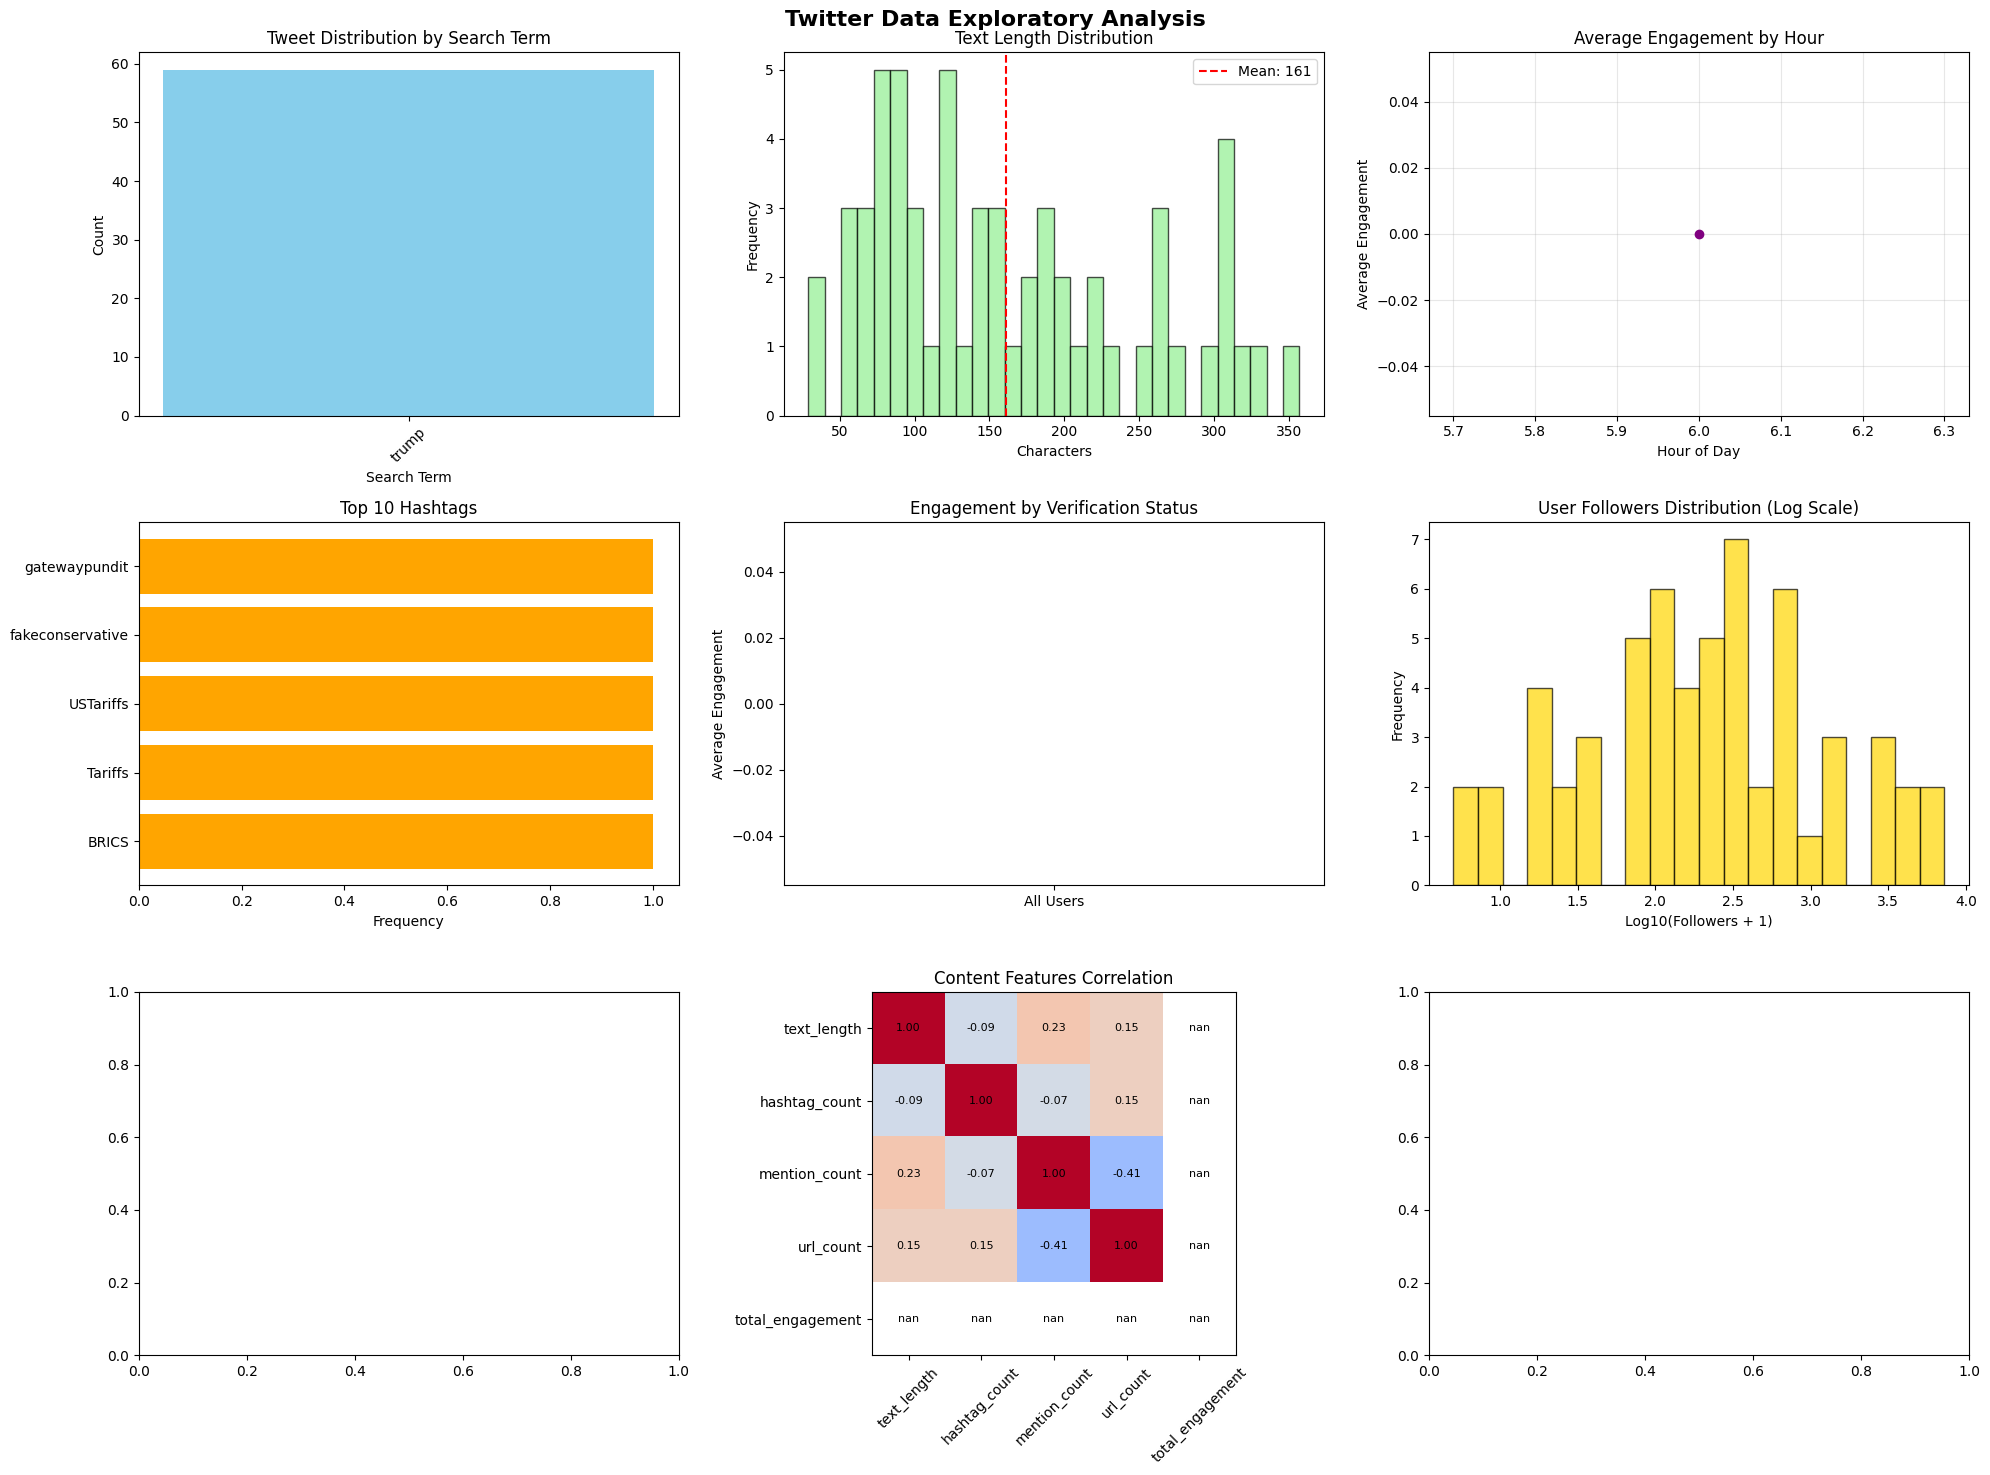


EDA SUMMARY STATISTICS
------------------------------
Dataset Overview:
  Total tweets: 59
  Date range: 2025-08-07 06:47:24+00:00 to 2025-08-07 06:47:49+00:00
  Unique users: 58
  Search terms: trump

Engagement Statistics:
       retweet_count  favorite_count  reply_count  total_engagement
count           59.0            59.0         59.0              59.0
mean             0.0             0.0          0.0               0.0
std              0.0             0.0          0.0               0.0
min              0.0             0.0          0.0               0.0
25%              0.0             0.0          0.0               0.0
50%              0.0             0.0          0.0               0.0
75%              0.0             0.0          0.0               0.0
max              0.0             0.0          0.0               0.0

Content Statistics:
  Average text length: 161.0 characters
  Tweets with hashtags: 6.8%
  Tweets with mentions: 71.2%
  Tweets with URLs: 32.2%
  Verified users

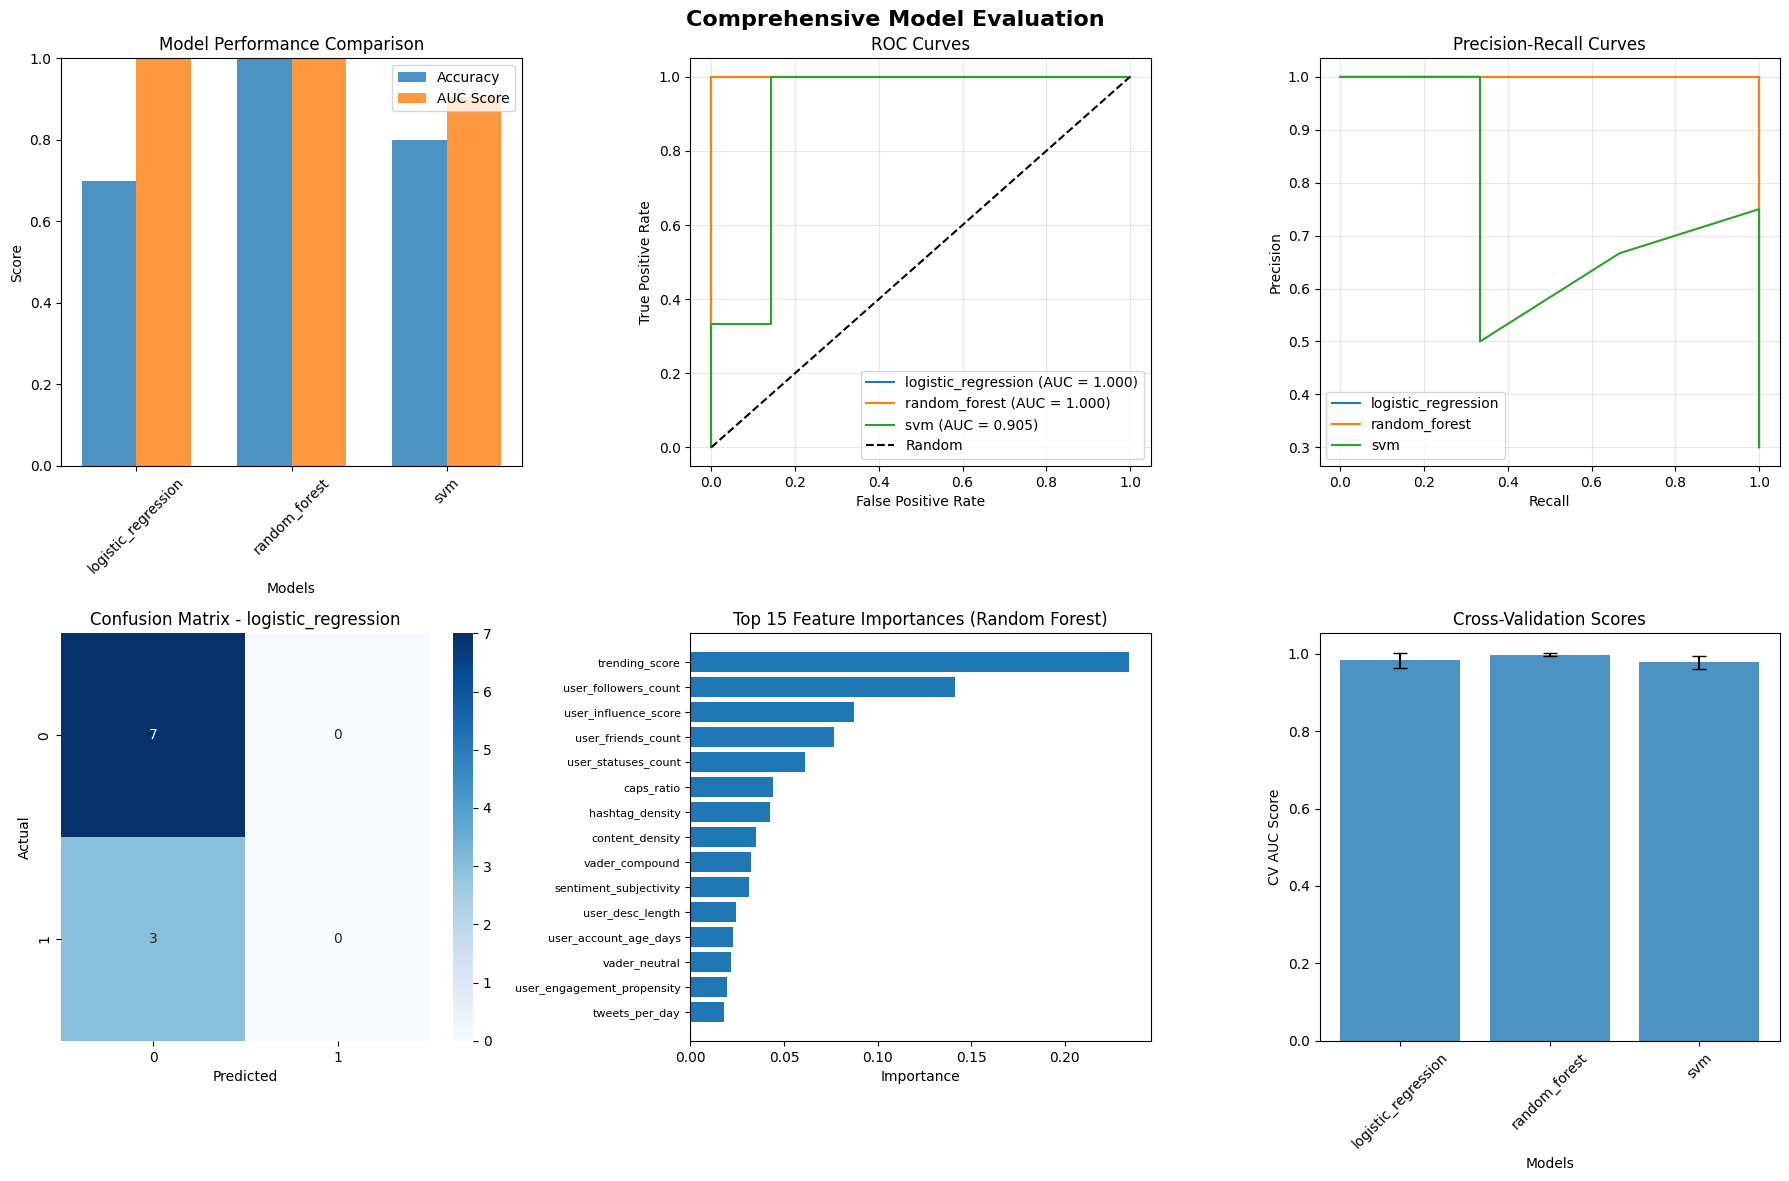


MODEL EVALUATION SUMMARY

LOGISTIC_REGRESSION:
  Accuracy: 0.7000
  AUC Score: 1.0000
  CV AUC: 0.9823 ± 0.0199
  Classification Report:
                  precision    recall  f1-score   support
    
               0       0.70      1.00      0.82         7
               1       0.00      0.00      0.00         3
    
        accuracy                           0.70        10
       macro avg       0.35      0.50      0.41        10
    weighted avg       0.49      0.70      0.58        10
    

RANDOM_FOREST:
  Accuracy: 1.0000
  AUC Score: 1.0000
  CV AUC: 0.9975 ± 0.0036
  Classification Report:
                  precision    recall  f1-score   support
    
               0       1.00      1.00      1.00         7
               1       1.00      1.00      1.00         3
    
        accuracy                           1.00        10
       macro avg       1.00      1.00      1.00        10
    weighted avg       1.00      1.00      1.00        10
    

SVM:
  Accuracy: 0.8000
  AUC

In [ ]:
if __name__ == "__main__":
    print("Advanced Twitter Trend Prediction Pipeline")
    print("==========================================")
    print("\nRequired setup:")
    print("1. Create .env file with Twitter API credentials:")
    print("   TWITTER_BEARER_TOKEN=your_bearer_token_here")
    print("\n2. Install required packages:")
    print("   pip install tweepy pandas numpy matplotlib seaborn scikit-learn")
    print("   pip install nltk textblob vadersentiment langdetect imbalanced-learn")
    print("   pip install spacy gensim python-dotenv wordcloud")
    print("   python -m spacy download en_core_web_sm")
    print("   python -m nltk.downloader punkt stopwords wordnet vader_lexicon")

    print("\n" + "=" * 60)

    # Create and run the advanced pipeline
    try:
        # Reduced tweet count for API compliance and real data focus
        predictor = AdvancedTwitterTrendPredictor(max_tweets_per_term=75)
        predictor.run_complete_pipeline()

    except KeyboardInterrupt:
        print("\nPipeline interrupted by user.")
    except Exception as e:
        print(f"\nPipeline error: {e}")
        print("Please check your setup and try again.")